<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8:**


# Introduction:
The dataset I am using for this assignment is a IMDb movies dataset containing infromation about movies' name, genre, release year, rating, runtime, gross earning, director and actor names. I have collected this dataset from kaggle.com [https://www.kaggle.com/datasets/bharatnatrayn/movies-dataset-for-feature-extracion-prediction], and then stored on my GitHub [https://github.com/Raji030/data602_project_data/blob/main/movies.csv]. 

I have chosen this dataset because I am a great consumer of movies. It is a great source of entertainment to me and it also helps me to get relieved from stresses of everyday life. Morever, I always find it interesting to understand the consumers' culture and the factors that drive a movie towards success.I am also curious about the difference between the viewer popularity and total gross.

______________
# Data exploration part:
In this part, I will import the dataset into my .ipynb, create dataframes, and explore the data including the following: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



# Import dataset using pandas 

In [254]:
import pandas as pd
url="https://raw.githubusercontent.com/Raji030/data602_project_data/main/movies.csv"
df=pd.read_csv(url)
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


# Summary statistics:

In [255]:
df.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


# Missing value information:

In [256]:
missing_values = df.isnull().sum()
print(missing_values)

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64


# Other relevant information:
Other relevant information include rows and columns number, data type for each column, and the columns' names.

In [257]:
# See data shape i.e. row and column numbers
df.shape

(9999, 9)

In [258]:
# See data type in different columns
df.dtypes

MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
Gross        object
dtype: object

In [259]:
# See column names
df.columns.tolist()

['MOVIES',
 'YEAR',
 'GENRE',
 'RATING',
 'ONE-LINE',
 'STARS',
 'VOTES',
 'RunTime',
 'Gross']

# Data wrangling part:
At first, I will create a subset of the original data and then perform the following: 

1. Modify multiple column names.

2. Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.

3. Fix missing and invalid values in data.

4. Create new columns based on existing columns or calculations.

5. Drop column(s) from your dataset.

6. Drop a row(s) from your dataset.

7. Convert all the string values to upper or lower cases in one column.

8. Check whether numeric values are present in a given column of your dataframe.
 

# Create subset:

In [260]:
# Subset,df1 of dataframe by dropping 3rd, 5th and 6th columns
df1 = df.drop(df.columns[[2,4,5]], axis=1)
df1.head()

,MOVIES,YEAR,RATING,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),6.1,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),5.0,"17,870",25.0,NaN
2,The Walking Dead,(2010–2022),8.2,"885,805",44.0,NaN
3,Rick and Morty,(2013– ),9.2,"414,849",23.0,NaN
4,Army of Thieves,(2021),NaN,NaN,NaN,NaN


# Modify multiple column names:

In [261]:
df1 = df1.rename(columns={'MOVIES':'movies', 'YEAR':'year', 'RATING':'rating', 'VOTES':'votes', 'RunTime':'runtime', 'Gross':'gross'})
df1.head()

,movies,year,rating,votes,runtime,gross
0,Blood Red Sky,(2021),6.1,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),5.0,"17,870",25.0,NaN
2,The Walking Dead,(2010–2022),8.2,"885,805",44.0,NaN
3,Rick and Morty,(2013– ),9.2,"414,849",23.0,NaN
4,Army of Thieves,(2021),NaN,NaN,NaN,NaN


# Convert different variables' data type into correct structure i.e. from non-numeric to numeric data type:

In [262]:
# Extract only single year in year column
df1['year'] = df1['year'].str.extract(r'(\d{4})')

# Convert year column to numeric data type
df1['year'] = pd.to_numeric(df1['year'])

# Remove commas from votes column
df1['votes'] = df1['votes'].replace(',', '', regex=True)

# Convert votes column to numeric data type
df1['votes'] = pd.to_numeric(df1['votes'])

# Extract numeric value in gross column
df1['gross'] = df1['gross'].str.extract('(\d+\.\d+|\d+)')

# Convert gross column to numeric
df1['gross'] = pd.to_numeric(df1['gross'])

# Check data types 
print(df1.dtypes)

df1.head()


movies      object
year       float64
rating     float64
votes      float64
runtime    float64
gross      float64
dtype: object


,movies,year,rating,votes,runtime,gross
0,Blood Red Sky,2021.0,6.1,21062.0,121.0,NaN
1,Masters of the Universe: Revelation,2021.0,5.0,17870.0,25.0,NaN
2,The Walking Dead,2010.0,8.2,885805.0,44.0,NaN
3,Rick and Morty,2013.0,9.2,414849.0,23.0,NaN
4,Army of Thieves,2021.0,NaN,NaN,NaN,NaN


# Fix missing and invalid values in data:

In [263]:
# Fill missing values with mean in rating, votes and runtime columns
df1['rating'].fillna(df1['rating'].mean(), inplace=True)
df1['votes'].fillna(df1['votes'].mean(), inplace=True)
df1['runtime'].fillna(df1['runtime'].mean(), inplace=True)

# Replace invalid values i.e. remove dollar signs and commas from the 'gross' column
df1['gross'] = df1['gross'].replace({'\$': '', ',': ''}, regex=True)
#df1['gross'].fillna(df1['gross'].mean(), inplace=True)

# Drop missing values in year and gross columns
df1.dropna(subset=['year', 'gross'], inplace=True)

# Drop duplicates
df1.drop_duplicates(inplace=True)
df1.head()

# Check if any missing value is still present
missing_values1 = df1.isnull().sum()
print(missing_values1)

movies     0
year       0
rating     0
votes      0
runtime    0
gross      0
dtype: int64


# Create new columns based on existing columns or calculations:

In [264]:
# Create a new column 'year_release' by converting year column to integer type 
df1['year_release'] = df1['year'].astype(int)

# Create new column named gross_earning 
df1['gross_earning'] = df1['gross']
df1.head()

,movies,year,rating,votes,runtime,gross,year_release,gross_earning
77,The Hitman's Bodyguard,2017.0,6.9,205979.0,118.0,75.47,2017,75.47
85,Jurassic Park,1993.0,8.1,897444.0,127.0,402.45,1993,402.45
95,Don't Breathe,2016.0,7.1,237601.0,88.0,89.22,2016,89.22
111,The Lord of the Rings: The Fellowship of the Ring,2001.0,8.8,1713028.0,178.0,315.54,2001,315.54
125,Escape Room,2019.0,6.4,99351.0,99.0,57.01,2019,57.01


# Drop column(s) from dataset:

In [265]:
# Drop year and gross columns
df1 = df1.drop(["year","gross"], axis=1)
df1.head()

,movies,rating,votes,runtime,year_release,gross_earning
77,The Hitman's Bodyguard,6.9,205979.0,118.0,2017,75.47
85,Jurassic Park,8.1,897444.0,127.0,1993,402.45
95,Don't Breathe,7.1,237601.0,88.0,2016,89.22
111,The Lord of the Rings: The Fellowship of the Ring,8.8,1713028.0,178.0,2001,315.54
125,Escape Room,6.4,99351.0,99.0,2019,57.01


# Drop a row(s) from dataset:

In [266]:
# Check if any column has a zero value
if (df1 == 0).any(axis=0).any():
    print("At least one column has a zero value")
else:
    print("No column has a zero value")

# Drop rows containing at least one zero value in any column
df1 = df1[~(df1==0).any(axis=1)]

# Check again if any column has a zero value
if (df1 == 0).any(axis=0).any():
    print("At least one column has a zero value")
else:
    print("No column has a zero value")

df1.head()

At least one column has a zero value
No column has a zero value


,movies,rating,votes,runtime,year_release,gross_earning
77,The Hitman's Bodyguard,6.9,205979.0,118.0,2017,75.47
85,Jurassic Park,8.1,897444.0,127.0,1993,402.45
95,Don't Breathe,7.1,237601.0,88.0,2016,89.22
111,The Lord of the Rings: The Fellowship of the Ring,8.8,1713028.0,178.0,2001,315.54
125,Escape Room,6.4,99351.0,99.0,2019,57.01


# Convert all the string values to upper or lower cases in one column:

In [267]:
# Convert 'movies' column to lowercase:
df1['movies'] = df1['movies'].str.lower()
df1.head()

,movies,rating,votes,runtime,year_release,gross_earning
77,the hitman's bodyguard,6.9,205979.0,118.0,2017,75.47
85,jurassic park,8.1,897444.0,127.0,1993,402.45
95,don't breathe,7.1,237601.0,88.0,2016,89.22
111,the lord of the rings: the fellowship of the ring,8.8,1713028.0,178.0,2001,315.54
125,escape room,6.4,99351.0,99.0,2019,57.01


# Check whether numeric values are present in a given column in the dataframe:

In [268]:
# Check if the gross_earning column has all numeric values
if pd.api.types.is_numeric_dtype(df1["gross_earning"]):
    print("All values in gross_earning column are numeric")
else:
    print("The column contains non-numeric values")

All values in gross_earning column are numeric


# Visualizations Part:

# Part-1:
# (a) Plot of top 1o movies based on their rating.

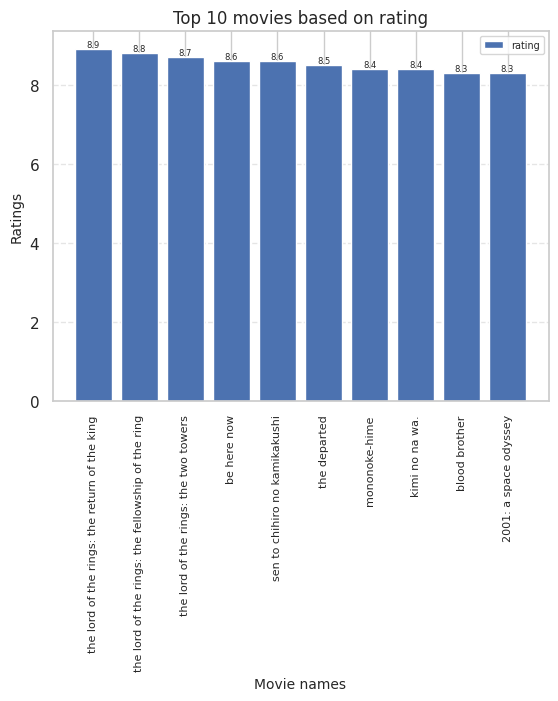

In [269]:
import matplotlib.pyplot as plt

# Get top 1o movies based on rating from df1 dataframe above
top10_movie = df1.sort_values(by='rating', ascending=False).head(10)

# Extract movie names, ratings, and gross earnings
movie_names = top10_movie['movies']
ratings = top10_movie['rating']
#gross_earnings=top10_movie['gross_earning']

# Plot a bar plot of top 10 movies based on their rating
plot1=plt.bar(movie_names, ratings)

# Specify axes name, plot title and fontsize
plt.xlabel('Movie names',fontsize=10)
plt.ylabel('Ratings',fontsize=10)
plt.title('Top 10 movies based on rating',fontsize=12)

# Rotate x labels
plt.xticks(rotation=90,fontsize=8)

# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Add a legend with specific fontsize
plt.legend(['rating'], loc='upper right', fontsize='xx-small')

# Add value annotations above each bar
plt.bar_label(plot1, fontsize=6)

# Show plot
plt.show()

In the bar plot above, the top 10 movies are plotted against their rating. Each bar in the plot shows a rating height correspnding to a movie name. The name of the top most rated movie in the plot is " the lord of the ring: the return of the king" and its corresponding rating is 8.9. On the other hand, the lowest rated movie is " 2001: a space odyssey" with a rating of 8.3. I have used matplotlib library for plotting the bar.Then I have customized the plot by adding axes labels and plot title with speicifc font sizes. Also, I have added legend to the upper right corner of the plot, annotations above each bar, grid lines and rotated x-axis label by 90 degerees to get the final plot.  

# (b) Plot of line chart showing top 5 movies rating and gross earning. It is that noted top 5 movies are chosen based on their rating.

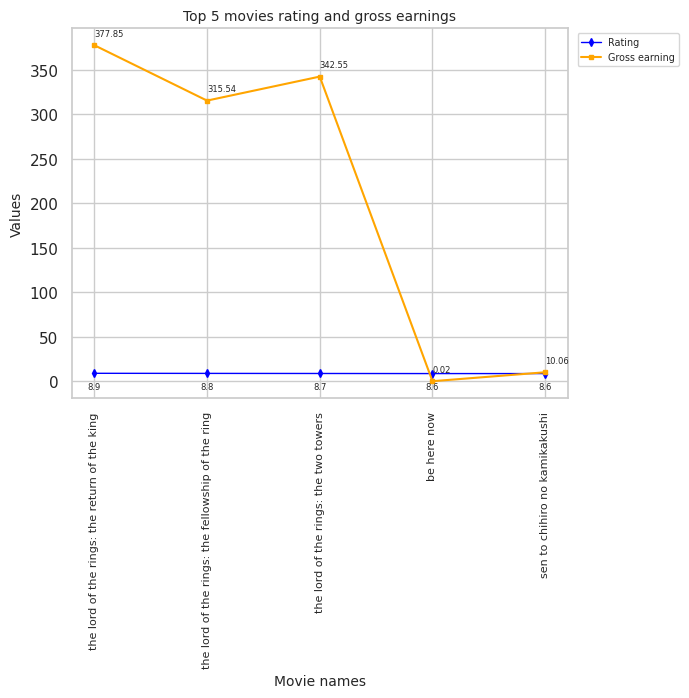

In [270]:
import matplotlib.pyplot as plt

# Get top 5 movies based on rating
top5_movie= df1.sort_values(by='rating', ascending=False).head(5)

# Extract movie names, ratings, and gross earnings
movie_names = top5_movie['movies']
ratings = top5_movie['rating']
gross_earnings=top5_movie['gross_earning']

# Create line by changing color, linewidth, marker, markersize and adding label
plt.plot(movie_names,ratings, color='blue',linewidth=1, marker='d', markersize=4, label='Rating')
plt.plot(movie_names, gross_earnings,color='orange',linewidth=1.5, marker='s', markersize=3.5, label='Gross earning')

# Provide title, x/y labels, and font size
plt.xlabel('Movie names',fontsize=10)
plt.ylabel('Values',fontsize=10)
plt.title('Top 5 movies rating and gross earnings',fontsize=10)

# Rotate x axis labels
plt.xticks(rotation=90,fontsize=8)

# Add value annotations above each point
for i, rating in enumerate(ratings):
    plt.text(i, rating-20, str(rating), ha='center', va='bottom', fontsize=6)

for i, gross_earning in enumerate(gross_earnings):
    plt.text(i, gross_earning+8, str(gross_earning), ha='left', va='bottom', fontsize=6)

# Add legend outside plot
plt.legend(loc='upper left', fontsize='xx-small', bbox_to_anchor=(1.01, 1))

# Show plot
plt.show()

In the plot above, the two lines corresponding ratings and gross earnings of top 5 movies are plotted using matplotlib library. Among the two lines, blue line represents the movie rating, and the orange line represents the gross earning. It is seen that the top most rated movie in the plot is " the lord of the ring: the return of the king", and its corresponding rating and gross earning are 8.9 and 377.85 million USD respectively. On the other hand, the " 2001: a space odyssey" is the lowest rated movie with a rating of 8.6 and a gross earning of 10.06 million USD. Here, I have plotted the lines by specifying colors,line widths, markers, and marker sizes. Then I have customized the lines by adding axes labels and titles with speicifc font sizes. Also, I have added legend to the outside of the plot, annotations above each point, and rotated x-axis label by 90 degerees to get the final plot.

# Plot-2: 
** Recreating the bar plot of plot-(a) using seaborn. Again, plot of top 10 movies based on their rating will be created here using top10_movie data.

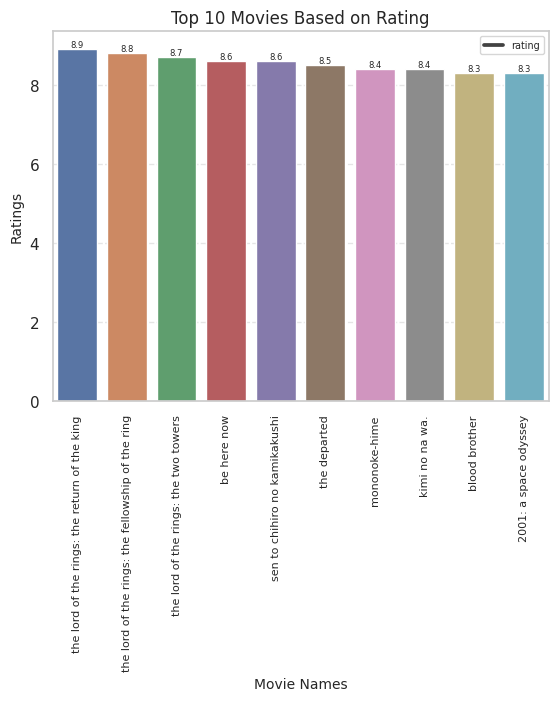

In [271]:
import seaborn as sns

# Plot same bar plot using Seaborn
ax = sns.barplot(x='movies', y='rating', data=top10_movie)

# Add value annotations above each bar
#for i, rating in enumerate(top10_movie['rating']):
    #ax.annotate(str(rating), xy=(i, rating), ha='center', va='bottom', fontsize=6)

# Specify x/y-axis labels and plot title
plt.xlabel('Movie Names', fontsize=10)
plt.ylabel('Ratings', fontsize=10)
plt.title('Top 10 Movies Based on Rating', fontsize=12)

# Add a legend with specific fontsize
plt.legend(['rating'], loc='upper right', fontsize='xx-small')

# Add value annotations above each bar
plt.bar_label(plot1, fontsize=6)

# Rotate x axis labels and set fontsize
plt.xticks(rotation=90, fontsize=8)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

The top 10 movies are plotted against their rating again by using sns.barplot function from seaborn library. Each bar in the plot again shows a rating height correspnding to a movie and gets a different bar color. The top most rated movie in the plot is " the lord of the ring: the return of the king" and its corresponding rating is 8.9. On the other hand, the lowest rated movie is " 2001: a space odyssey" with a rating of 8.3. After plotting the bar, I have customized the plot by adding axes labels and plot title with speicifc font sizes. Also, I have added legend to the upper right corner of the plot, annotations above each bar, grid lines and rotated x-axis label by 90 degerees to get the final bar plot. It is noted that the seaborn library does not have standalone functions to specify and add different properties in the plot. Rather it utilizes functions from matplotlib library to get its plot customization and properties addition.

** Recreating the line plot using seaborn. Again, top5_movie data is used here to create the line plot. 

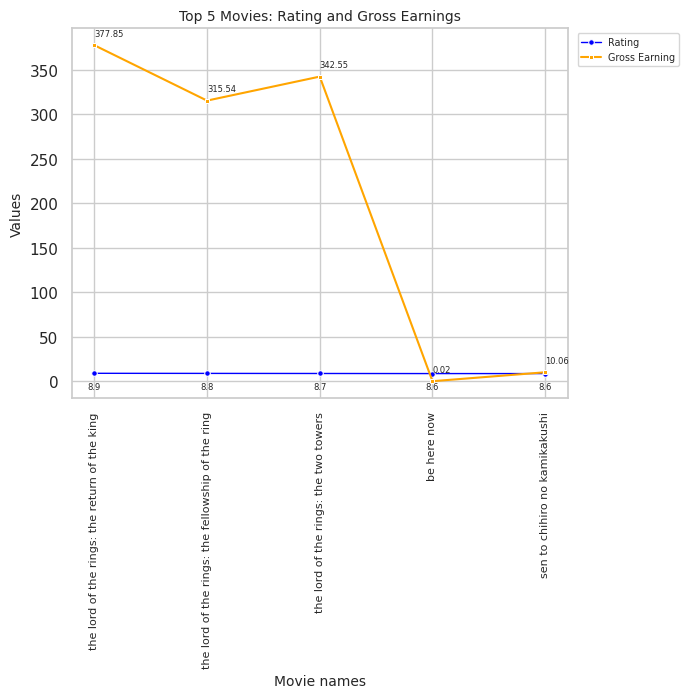

In [272]:
import seaborn as sns

# Plot same line using seaborn
sns.lineplot(x='movies', y='rating', data=top5_movie, color='blue',marker='o', markersize=4, linewidth=1, label='Rating')
sns.lineplot(x='movies', y='gross_earning', data=top5_movie, color='orange',marker='s', markersize=3.5, linewidth=1.5, label='Gross Earning')

# Specify x/y labels and title
plt.xlabel('Movie names', fontsize=10)
plt.ylabel('Values', fontsize=10)
plt.title('Top 5 Movies: Rating and Gross Earnings', fontsize=10)

# Rotate x axis labels
plt.xticks(rotation=90, fontsize=8)

# Add value annotations above each point
for i, rating in enumerate(top5_movie['rating']):
 plt.text(i, rating - 20, str(rating), ha='center', va='bottom', fontsize=6)

for i, gross_earning in enumerate(top5_movie['gross_earning']):
 plt.text(i, gross_earning + 8, str(gross_earning), ha='left', va='bottom', fontsize=6)

# Add legend outside plot
plt.legend(loc='upper left', fontsize='xx-small', bbox_to_anchor=(1.01, 1))

# Show plot
plt.show()

The two lines corresponding ratings and gross earnings of top 5 movies are plotted again using sns.lineplot function from seaborn library. Among the two lines, blue line represents the movie rating, and the orange line represents the gross earning. It is seen that the top most rated movie in the plot is " the lord of the ring: the return of the king", and its corresponding rating and gross earning are 8.9 and 377.85 million USD respectively. On the other hand, the " 2001: a space odyssey" is the lowest rated movie with a rating of 8.6 and a gross earning of 10.06 million USD. Here, I have plotted the lines by specifying colors,line widths, markers, and marker sizes. Then I have customized the lines by adding axes labels and titles with speicifc font sizes. Also, I have added legend to the outside of the plot, annotations above each point, and rotated x-axis label by 90 degerees to get the final plot. It is noted that the seaborn library utilizes functions from matplotlib library to get its plot customization and properties addition.

# Part-3: Differences between creating plot in matplotlib and seaborn:

After plotting the bar plot and line plot using matplotlib and seaborn libraries I have observed the following differences:
1. Seaborn and matplotlib use different function to plot bar plot and line plot. In order to plot a bar plot using seaborn library the sns.barplot function is used and to plot a line plot sns.lineplot function is used. On the other hand, to plot a bar plot using matplotlib the plt.bar function is used and to plot plot a line plot plt.plot function is used. 
2. Both the sns.barplot and sns.lineplot functions take data argument. On the other hand, both the plt.bar and plt.plot function don't take any data argument.
3. Seaborn does not have standalone functions for creatig x/y labels, plot title,legend, adding annotation, rotating axes label, and showing plot. Rather seaborn utilizes the underlying Matplotlib functions for customization and plotting, allowing us to combine the functionality of both libraries. 
4. In seaborn bar plot, each bar gets different color by default, whereas in matplotlib bar plot, each bar gets the same color by default. Aditionally, in searborn, grid lines are added to line plot by default. Therefore, seaborn  barplot and lineplot by default provides easy and aesthetically pleasing visualization of data .

# Conclusion: 
After exploring the dataset, I have found that the dataset has 9,999 rows and 9 columns. The columns include information such as the movie title, year of release, genre, duration, rating, votes, director, actors, and gross income. The dataset has missing values in the year, genre, rating,votes, run time and gross columns, and the data type for year, votes, and gross earning cloumns are not in appropriate data type. The mean of the movie rating is 6.92 and the mean of the movie run time is 68.69 minutes. And the maximum rating value is 8.9 and the maximum run time is 853 minnutes. In this dataset, the target variable is not clearly defined. I could potentially use the gross income as a proxy for movie's success and explore its distribution along with other movie features. Finally, I have plotted a bar plot of top 10 movies against their rating and two line plots of top 5 movies' rating and gross earning using the matplotlib and the seaborn libraries and found that the top most rated movie in each plot is " the lord of the ring: the return of the king" and its corresponding rating is 8.9 and gross earning is 377.85 million USD respectively. Additionally, I have found that the seaborn library has different function to plot the bar plot and line plot, but it utilizes functions from the matplotlib library for customizing and adding different properties to its plots.  